# Imports and loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

### Confirming 100 unique customers exist in dataset  

In [4]:
df["account"].nunique()

100

### Dropping irrelevant features 

In [5]:
df = df[["status","card_present_flag","balance","date",
                   "gender","age","merchant_suburb","merchant_state",
                   "amount","customer_id","movement"]]
df["date"] = pd.to_datetime(df["date"])
df.head()

,status,card_present_flag,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,movement
0,authorized,1.0,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,debit
1,authorized,0.0,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,debit
2,authorized,1.0,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,debit
3,authorized,1.0,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,debit
4,authorized,1.0,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,debit


# Exploratory Data Analysis

### Total number of transactions made on each day  

In [6]:
df["date"].value_counts().head()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
Name: date, dtype: int64

### Total number of transactions made by each customer

<function matplotlib.pyplot.legend>

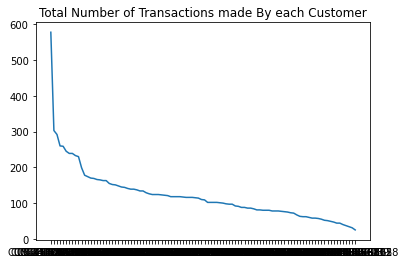

In [7]:
plt.title("Total Number of Transactions made By each Customer")
plt.plot(df["customer_id"].value_counts())
plt.legend

### Transaction volume each day

In [8]:
df_date_count = df.groupby("date").count()

In [9]:
trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)

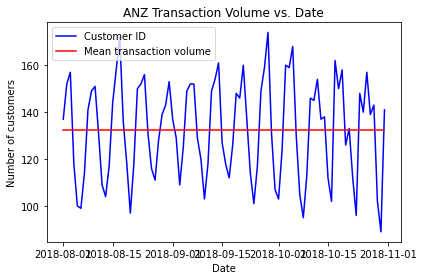

In [10]:
plt.figure()
plt.plot(df_date_count.index, 
         df_date_count["customer_id"], 
         c="blue", 
         label = "Customer ID")
plt.plot(df_date_count.index,
         np.linspace(trans_vol,trans_vol,n_points), 
         c="r", 
         label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()

### Mean transaction amount each day

In [11]:
df_date_mean = df.groupby("date").mean()

In [12]:
trans_amt = df_date_mean["amount"].mean()
n_points = len(df_date_count.index)

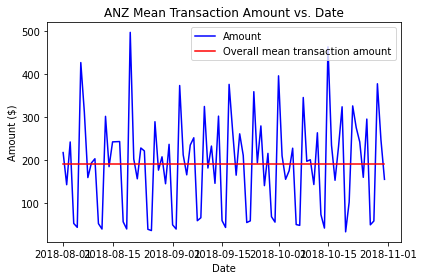

In [13]:
plt.figure()
plt.plot(df_date_count.index,
         df_date_mean["amount"], 
         c="blue",
         label = "Amount")
plt.plot(df_date_count.index, 
         np.linspace(trans_amt,trans_amt,n_points),
         c="r", 
         label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [14]:
months = []
for date in df["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")

df["Months"] = months
df["Months"].head()

0    August
1    August
2    August
3    August
4    August
Name: Months, dtype: object

### Mean customer balance and payment amount by age 

In [15]:
df_cus_aug = df[df["Months"] == "August"].groupby("customer_id").mean()
df_gen_aug = df[df["Months"] == "August"].groupby("gender").mean()

In [16]:
mean_f_bal_aug = df_gen_aug["balance"].iloc[0]
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]
n_points = len(df_cus_aug["age"])

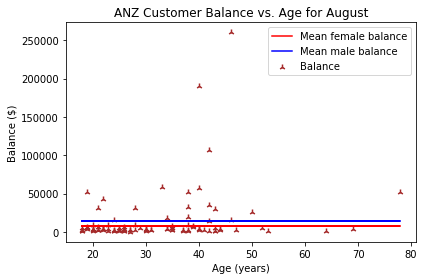

In [17]:
plt.figure()
plt.scatter(df_cus_aug["age"],
            df_cus_aug["balance"], 
            c="brown",
            label="Balance",
            marker="2")
plt.plot(df_cus_aug["age"],
         np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points),
         c="r", 
         label = "Mean female balance")
plt.plot(df_cus_aug["age"], 
         np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), 
         c="b", 
         label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [18]:
mean_f_amt_aug = df_gen_aug["amount"].iloc[0]
mean_m_amt_aug = df_gen_aug["amount"].iloc[1]

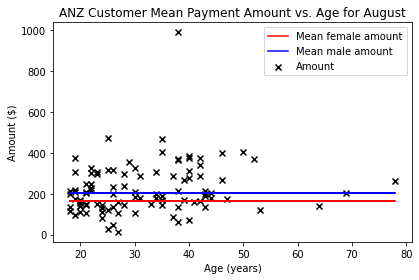

In [19]:
plt.scatter(df_cus_aug["age"],
            df_cus_aug["amount"], 
            c="black",
            label="Amount",
            marker="x")
plt.plot(df_cus_aug["age"], 
         np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), 
         c="r", 
         label = "Mean female amount")
plt.plot(df_cus_aug["age"], 
         np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), 
         c="b",
         label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [20]:
df_cus_sep = df[df["Months"] == "September"].groupby("customer_id").mean()
df_gen_sep = df[df["Months"] == "September"].groupby("gender").mean()

In [21]:
mean_f_bal_sep = df_gen_sep["balance"].iloc[0]
mean_m_bal_sep = df_gen_sep["balance"].iloc[1]
n_points = len(df_cus_sep["age"])

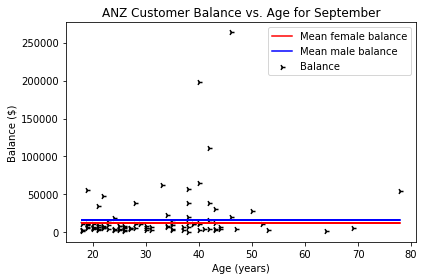

In [22]:
plt.figure()
plt.scatter(df_cus_sep["age"], 
            df_cus_sep["balance"], 
            c="black",
            label="Balance",
            marker="4")
plt.plot(df_cus_sep["age"],
         np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points),
         c="r", 
         label = "Mean female balance")
plt.plot(df_cus_sep["age"],
         np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), 
         c="b",
         label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [23]:
mean_f_amt_sep = df_gen_sep["amount"].iloc[0]
mean_m_amt_sep = df_gen_sep["amount"].iloc[1]

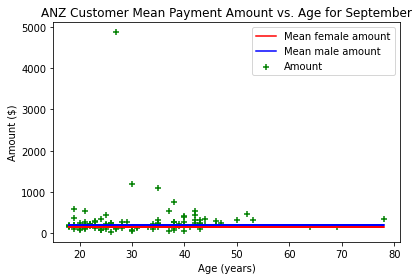

In [24]:
plt.scatter(df_cus_sep["age"],
            df_cus_sep["amount"], 
            c="green",
            label="Amount",
            marker="+")
plt.plot(df_cus_sep["age"],
         np.linspace(mean_f_amt_sep,mean_f_amt_sep,n_points),
         c="r",
         label = "Mean female amount")
plt.plot(df_cus_sep["age"], 
         np.linspace(mean_m_amt_sep,mean_m_amt_sep,n_points),
         c="b",
         label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

In [25]:
df_cus_oct = df[df["Months"] == "October"].groupby("customer_id").mean()
df_gen_oct = df[df["Months"] == "October"].groupby("gender").mean()

In [26]:
mean_f_bal_oct = df_gen_oct["balance"].iloc[0]
mean_m_bal_oct = df_gen_oct["balance"].iloc[1]
n_points = len(df_cus_oct["age"])

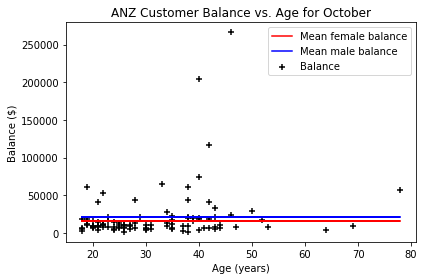

In [27]:
plt.figure()
plt.scatter(df_cus_oct["age"], 
            df_cus_oct["balance"], 
            c="black",
            label="Balance",marker="+")
plt.plot(df_cus_oct["age"],
         np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points),
         c="r", 
         label = "Mean female balance")
plt.plot(df_cus_oct["age"],
         np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), 
         c="b",
         label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance ($)")
plt.legend()
plt.tight_layout()

In [28]:
mean_f_amt_oct = df_gen_oct["amount"].iloc[0]
mean_m_amt_oct = df_gen_oct["amount"].iloc[1]

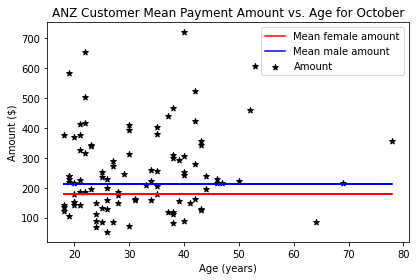

In [29]:
plt.scatter(df_cus_oct["age"], 
            df_cus_oct["amount"], 
            c="black", 
            label="Amount",
            marker="*")
plt.plot(df_cus_oct["age"], 
         np.linspace(mean_f_amt_oct,mean_f_amt_oct,n_points),
         c="r", 
         label = "Mean female amount")
plt.plot(df_cus_oct["age"], 
         np.linspace(mean_m_amt_oct,mean_m_amt_oct,n_points), 
         c="b",
         label = "Mean male amount")
plt.title("ANZ Customer Mean Payment Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount ($)")
plt.legend()
plt.tight_layout()

# Pie Charts


NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64


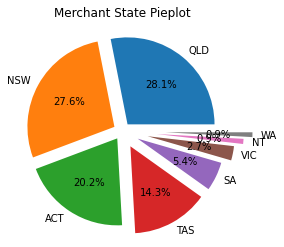

In [30]:
plt.title("Merchant State Pieplot")
plt.pie(df["merchant_state"].value_counts(),
        labels=list(set(df["merchant_state"]))[1:],
        explode=[0.1,0.1,0.1,0.2,0.2,0.3,0.4,0.5],
        autopct='%1.1f%%')
plt.legend
print(df["merchant_state"].value_counts())

debit     11160
credit      883
Name: movement, dtype: int64


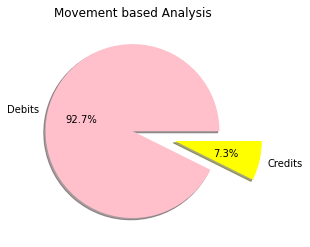

In [31]:
plt.title("Movement based Analysis")
plt.pie(df["movement"].value_counts(),labels=["Debits","Credits"],
        explode=[0,0.5],
        autopct='%1.1f%%',
        shadow=True,
        colors=["Pink","yellow"])
plt.legend
print(df["movement"].value_counts())

Amount Debited : 586707.35
Amount Credited : 1676576.85


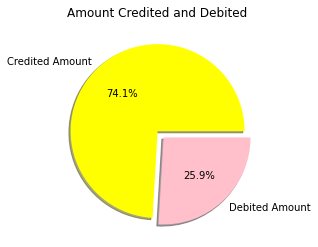

In [32]:
df_credit = df[df["movement"]=="credit"]["amount"].sum()
df_debit = df[df["movement"]=="debit"]["amount"].sum()
plt.title("Amount Credited and Debited")
plt.pie([df_credit,df_debit],labels=["Credited Amount" ,"Debited Amount"],
        explode=[0,0.1],
        autopct='%1.1f%%',
        shadow=True,
        colors=["yellow","pink"])
plt.legend
print("Amount Debited :",df_debit)
print("Amount Credited :",df_credit)

authorized    7717
posted        4326
Name: status, dtype: int64


<function matplotlib.pyplot.legend>

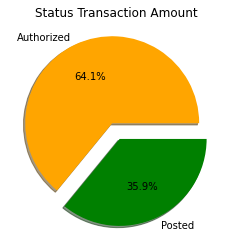

In [33]:
print(df["status"].value_counts())
plt.title("Status Transaction Amount")
plt.pie(df["status"].value_counts(),
        labels=["Authorized","Posted"],
        autopct='%1.1f%%',
        shadow=True,
        explode=[0.1,0.1],
        colors=["orange","green"])
plt.legend

M    6285
F    5758
Name: gender, dtype: int64


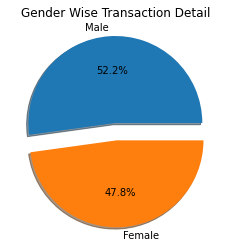

In [34]:
plt.pie(df["gender"].value_counts(),
        labels=["Male","Female"],
        shadow=True,
        explode=[0.1,0.1],
        autopct='%1.1f%%')
plt.title("Gender Wise Transaction Detail")
plt.legend
print(df["gender"].value_counts())

August_Mean_Amount :  162.92656661400727
September_Mean_Amount :  163.19336803748033
October_Mean_Amount :  179.27276573787393


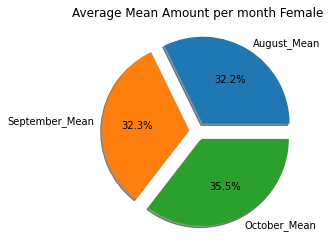

In [35]:
plt.title("Average Mean Amount per month Female",)
plt.pie([mean_f_amt_aug,mean_f_amt_sep,mean_f_amt_oct],
        labels=["August_Mean","September_Mean","October_Mean"],
        autopct='%1.1f%%',
        shadow=True,
        explode=[0.1,0.1,0.1])
plt.legend
print("August_Mean_Amount : ",mean_f_amt_aug)
print("September_Mean_Amount : ",mean_f_amt_sep)
print("October_Mean_Amount : ",mean_f_amt_oct)

August_Mean_Balance :  7443.947172195884
September_Mean_Balance :  13010.549875065064
October_Mean_Balance :  15644.693276573738


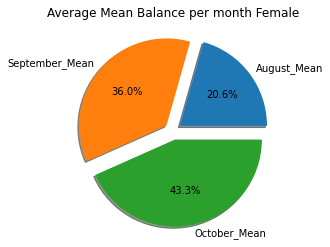

In [36]:
plt.title("Average Mean Balance per month Female",)
plt.pie([mean_f_bal_aug,mean_f_bal_sep,mean_f_bal_oct],
        labels=["August_Mean","September_Mean","October_Mean"],
        autopct='%1.1f%%',
        shadow=True,
        explode=[0.1,0.1,0.1])
plt.legend
print("August_Mean_Balance : ",mean_f_bal_aug)
print("September_Mean_Balance : ",mean_f_bal_sep)
print("October_Mean_Balance : ",mean_f_bal_oct)

August_Mean_Amount :  205.74264677103739
September_Mean_Amount :  199.3574330783938
October_Mean_Amount :  211.8975570032573


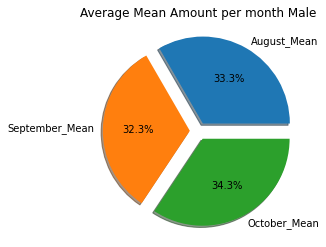

In [37]:
plt.title("Average Mean Amount per month Male",)
plt.pie([mean_m_amt_aug,mean_m_amt_sep,mean_m_amt_oct],
        labels=["August_Mean","September_Mean","October_Mean"],
        autopct='%1.1f%%',
        shadow=True,
        explode=[0.1,0.1,0.1])
plt.legend
print("August_Mean_Amount : ",mean_m_amt_aug)
print("September_Mean_Amount : ",mean_m_amt_sep)
print("October_Mean_Amount : ",mean_m_amt_oct)

August_Mean_Balance :  13906.689006849283
September_Mean_Balance :  16309.192256214097
October_Mean_Balance :  20981.752889716106


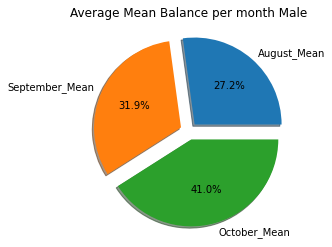

In [38]:
plt.title("Average Mean Balance per month Male",)
plt.pie([mean_m_bal_aug,mean_m_bal_sep,mean_m_bal_oct],
        labels=["August_Mean","September_Mean","October_Mean"],
        autopct='%1.1f%%',
        shadow=True,
        explode=[0.1,0.1,0.1])
plt.legend
print("August_Mean_Balance : ",mean_m_bal_aug)
print("September_Mean_Balance : ",mean_m_bal_sep)
print("October_Mean_Balance : ",mean_m_bal_oct)

<function matplotlib.pyplot.legend>

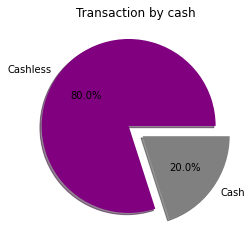

In [39]:
df[df["card_present_flag"]==1.0]["amount"].sum()
df[df["card_present_flag"]==0.0]["amount"].sum()
plt.title("Transaction by cash")
plt.pie([df[df["card_present_flag"]==1.0]["amount"].sum(),df[df["card_present_flag"]==0.0]["amount"].sum()],
        shadow=True,explode=[0.1,0.1],
        autopct='%1.1f%%',
        labels=["Cashless","Cash"],
        colors=["purple","grey"])
plt.legend